In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install easypreprocessing

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [28]:
prep=EasyPreProcessing(r'train.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [29]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

In [30]:
prep.categorical.fields

['week']

In [31]:
prep.numerical.fields

['record_ID',
 'store_id',
 'sku_id',
 'total_price',
 'base_price',
 'is_featured_sku',
 'is_display_sku',
 'units_sold']

In [32]:
prep.missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [33]:
prep.numerical.impute()

Numerical features imputated successfully.


In [34]:
prep.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0


In [35]:
prep.dataset['key'] = prep.dataset['week'].astype(str) + '_' + prep.dataset['store_id'].astype(str)
prep.dataset = prep.dataset.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)
prep.dataset = prep.dataset.groupby('key').sum()
prep.df

,units_sold
key,
01/01/13_8023.0,2025.0
01/01/13_8058.0,682.0
01/01/13_8063.0,535.0
01/01/13_8091.0,210.0
01/01/13_8094.0,782.0
...,...
31/10/11_9890.0,531.0
31/10/11_9909.0,551.0
31/10/11_9954.0,431.0


<Axes: xlabel='key'>

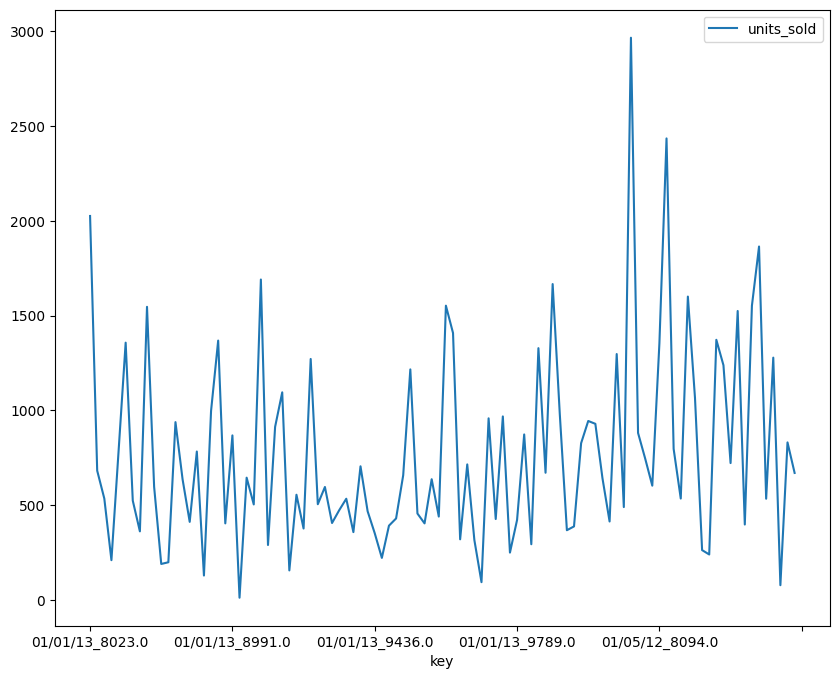

In [37]:
prep.df[:100].plot(figsize=(10, 8))

In [38]:
prep.df['day_1'] = prep.df['units_sold'].shift(-1) 
prep.df['day_2'] = prep.df['units_sold'].shift(-2) 
prep.df['day_3'] = prep.df['units_sold'].shift(-3) 
prep.df['day_4'] = prep.df['units_sold'].shift(-4)


In [39]:
prep.df

,units_sold,day_1,day_2,day_3,day_4
key,,,,,
01/01/13_8023.0,2025.0,682.0,535.0,210.0,782.0
01/01/13_8058.0,682.0,535.0,210.0,782.0,1357.0
01/01/13_8063.0,535.0,210.0,782.0,1357.0,524.0
01/01/13_8091.0,210.0,782.0,1357.0,524.0,362.0
01/01/13_8094.0,782.0,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...
31/10/11_9890.0,531.0,551.0,431.0,820.0,506.0
31/10/11_9909.0,551.0,431.0,820.0,506.0,NaN
31/10/11_9954.0,431.0,820.0,506.0,NaN,NaN


In [40]:
df=prep.df.dropna()

<Axes: xlabel='key'>

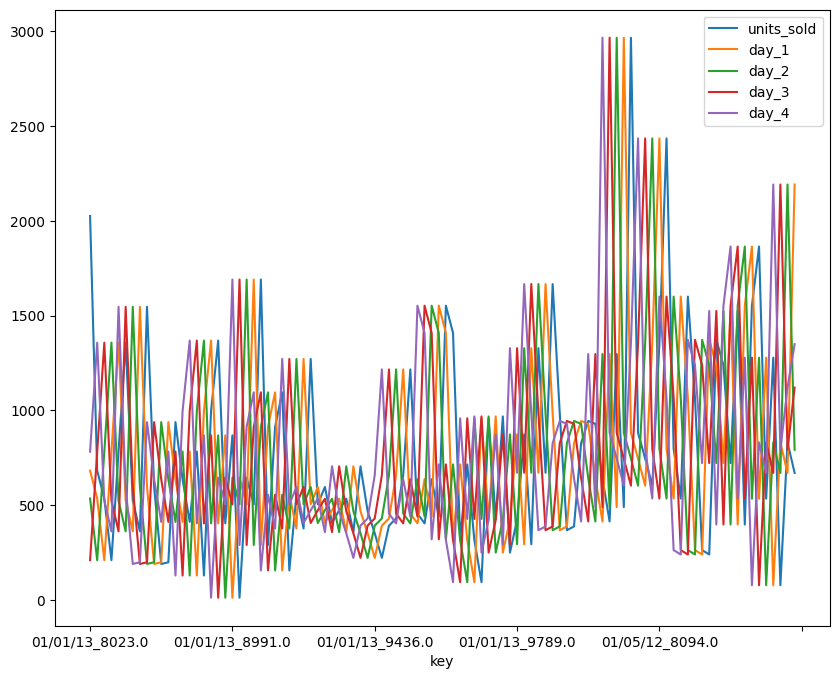

In [42]:
df[:100].plot(figsize=(10,8))

In [43]:
x1,x2,x3,x4,y=df['day_1'],df['day_2'],df['day_3'],df['day_4'],df['units_sold']
x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
split_percentage=15
test_split=int(len(df)*(split_percentage/100))
x=np.concatenate((x1,x2,x3,x4),axis=1)
x_train,x_test,y_train,y_test=x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8395, 4)
(1481, 4)
(8395, 1)
(1481, 1)


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor()
rf_regressor.fit(x_train,y_train)
y_pred=rf_regressor.predict(x_test)

In [46]:
print("R sq.Score for Random Forest Regression:",rf_regressor.score(x_test,y_test))

R sq.Score for Random Forest Regression: 0.6839268732497534


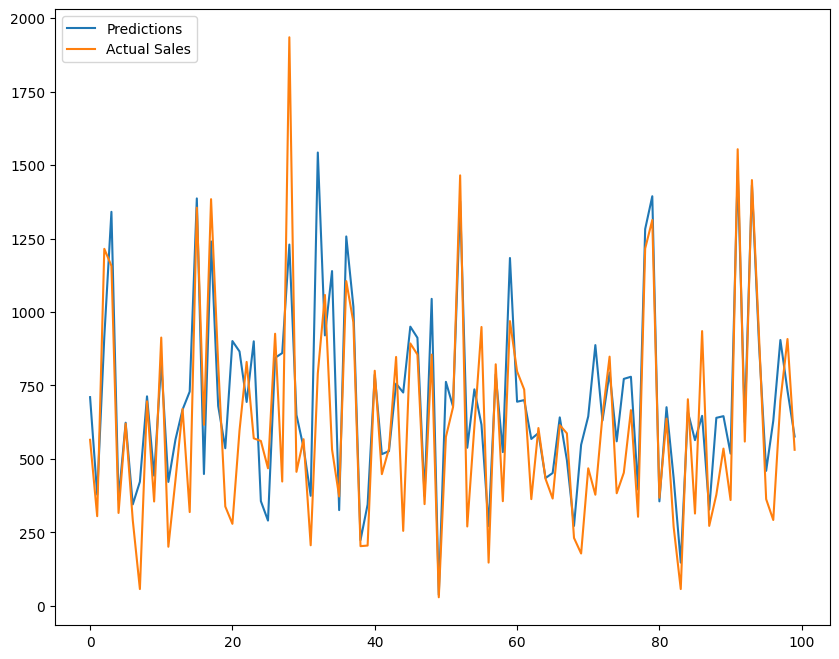

In [47]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,8)
plt.plot(y_pred[-100:],label='Predictions')
plt.plot(y_test[-100:],label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [48]:
pip install xgboost

In [49]:
import xgboost
xgb_regressor=xgboost.XGBRegressor()
xgb_regressor.fit(x_train,y_train)
y_pred=xgb_regressor.predict(x_test)

In [50]:
print("R Sq. Score for XGBoost:",xgb_regressor.score(x_test,y_test))

R Sq. Score for XGBoost: 0.5962779753990961


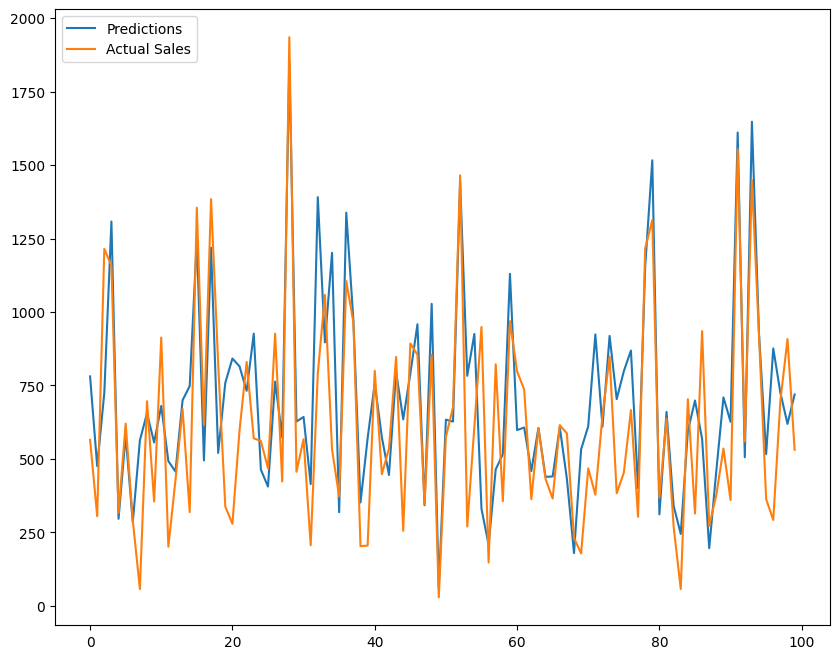

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:],label='Predictions')
plt.plot(y_test[-100:],label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [52]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace (start=50,stop=250,num=10)] 
#Number of features to consider at every split
max_features=['auto','sqrt']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(0,120,num=20)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree 
bootstrap = [True,False]
#Create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split, 
               'min_samples_leaf':min_samples_leaf, 
               'bootstrap':bootstrap}
print(random_grid)


{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [53]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()
#Random search of parameters, using 3 fold cross validation
#search across 100 different combinations, and use all available cross
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0)


In [54]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   0.0s
[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   0.0s
[CV] END bootstrap=True, max_depth=94, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=94; total time=   0.0s
[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   0.0s
[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   0.0s
[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=205; total time=   0.0s
[CV] END bootstrap=True, max_depth=56, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=116; total 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 205,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [56]:
best_random = rf_random.best_estimator_

In [57]:
y_pred = best_random.predict(x_test)

In [58]:
print("R Sq. Score for Random Forest Regression :", best_random.score(x_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(x_test, y_test))*(len(y_test)-1)/(len(x_test)))

R Sq. Score for Random Forest Regression : 0.6770362577369369
Adj. R Sq. Score for Random Forest Regression : 0.6772543291361692


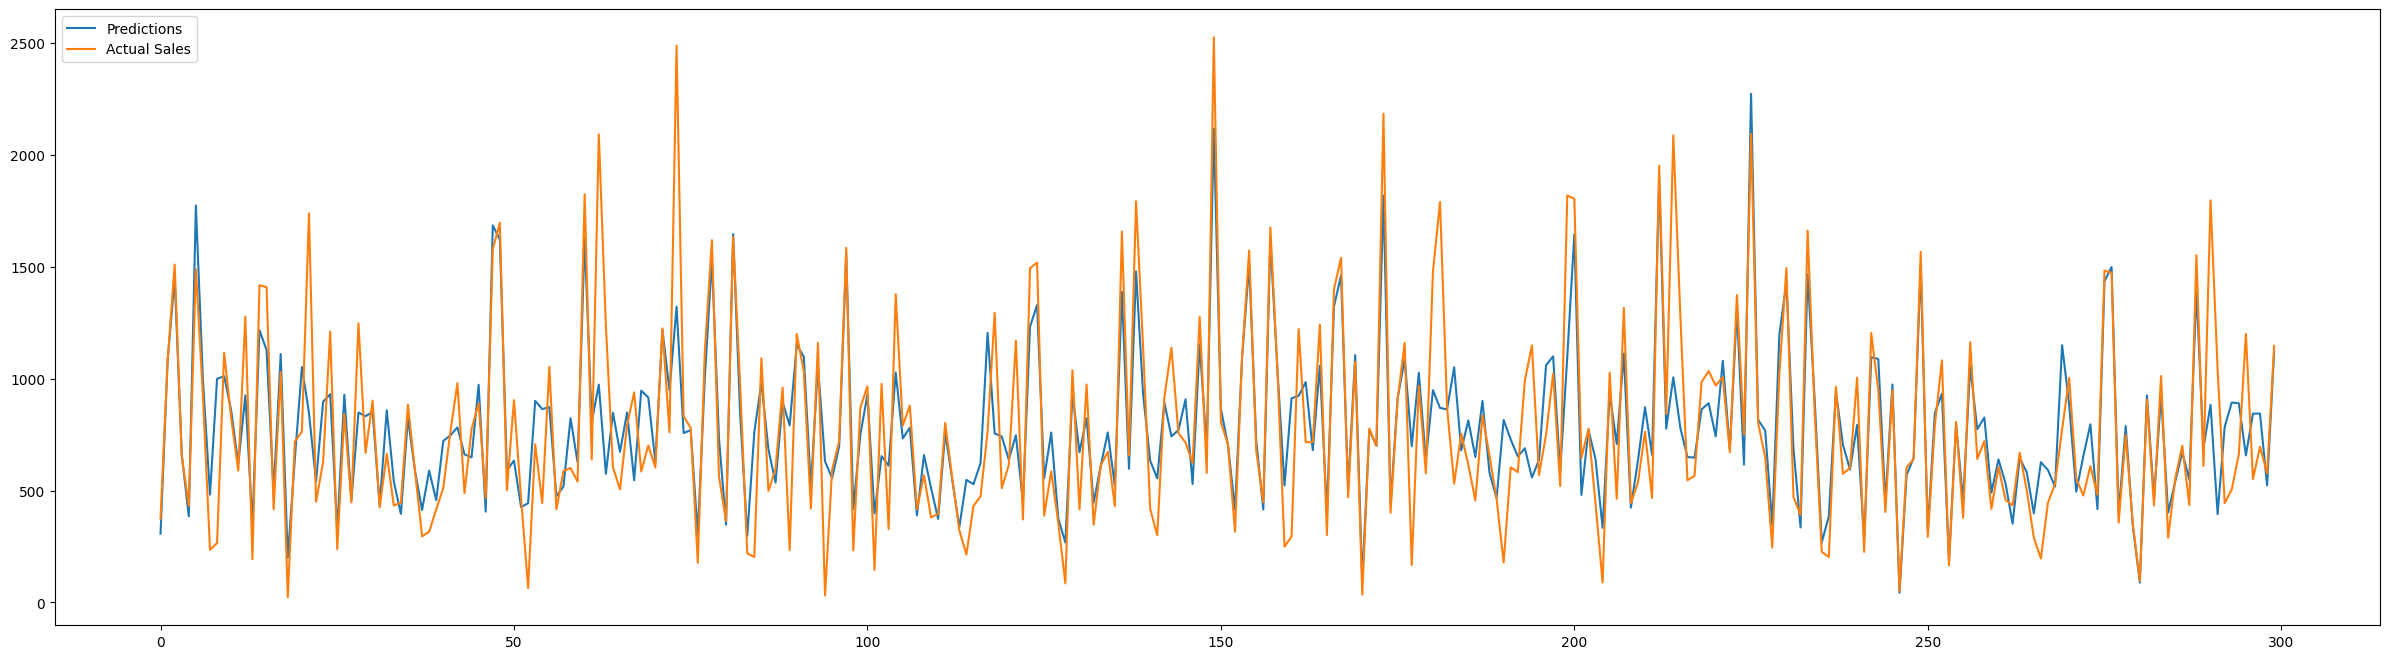

In [59]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800],label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig("final.png")
plt.show()

In [60]:
# saving the model
import pickle
pickle.dump(rf_regressor,open('sales_demand_forecasting.pkl','wb'))

In [61]:
#rf_regressor
features = np.array([[682.0,535.0,210.0,782.0]])
print(rf_regressor.predict(features))

[1976.74]
